In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [20]:
from ppo import train_ppo, PPOAgent
from sb3_model import train_sb3_ppo
from random_model import train_random_agent
from comparison import compare

In [24]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

ENV_NAME = "Acrobot-v1" # Nome dell'ambiente
TOTAL_TIMESTEPS = 100000  # Ridotto per testing veloce

print(f"Environment: {ENV_NAME}")
print(f"Training timesteps: {TOTAL_TIMESTEPS}")
print(f"Test episodes: {TEST_EPISODES}")


Environment: Acrobot-v1
Training timesteps: 100000
Test episodes: 10


In [22]:
results = {
    'models': [],
    'training_times': [],
    'episode_rewards': [],
    'final_performance': []
}

In [25]:
print("\nTraining Random Agent...")
start_time = time.time()
random_scores = train_random_agent(ENV_NAME, TOTAL_TIMESTEPS)
random_training_time = time.time() - start_time

results['models'].append('Random Agent')
results['training_times'].append(random_training_time)
results['episode_rewards'].append(random_scores)
results['final_performance'].append(np.mean(random_scores[-10:]) if len(random_scores) >= 10 else np.mean(random_scores))

print(f"Random Agent completed - Time: {random_training_time:.2f}s")


Training Random Agent...
🎲 Training Random Agent...
Random Agent completed - Time: 3.38s


In [ ]:
print("\nTraining PPO Custom...")
start_time = time.time()
ppo_scores, ppo_agent = train_ppo(ENV_NAME, TOTAL_TIMESTEPS, save_model_flag=False)
ppo_training_time = time.time() - start_time

results['models'].append('PPO Custom')
results['training_times'].append(ppo_training_time)
results['episode_rewards'].append(ppo_scores)
results['final_performance'].append(np.mean(ppo_scores[-10:]) if len(ppo_scores) >= 10 else np.mean(ppo_scores))

print(f"PPO Custom completed - Time: {ppo_training_time:.2f}s")


2️⃣ Training PPO Custom...
🚀 Training PPO (FIXED VERSION)...
📋 Horizon: 2048, Epochs: 10, Minibatch: 64
🔄 Update at timestep 2048 (horizon reached)


/Users/riccardo/Desktop/IntroToML_Project/ppo.py:125: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  states = torch.FloatTensor(self.memory['states'])


🔄 Update at timestep 4096 (horizon reached)
📊 Episode 10, Timesteps: 4964
   Last episode: -500.0 steps
   Avg (last 10): -496.3 (min: -500.0, max: -463.0)
🔄 Update at timestep 6144 (horizon reached)
🔄 Update at timestep 8192 (horizon reached)
📊 Episode 20, Timesteps: 9825
   Last episode: -393.0 steps
   Avg (last 10): -485.8 (min: -500.0, max: -393.0)
🔄 Update at timestep 10240 (horizon reached)
🔄 Update at timestep 12288 (horizon reached)
📊 Episode 30, Timesteps: 13749
   Last episode: -370.0 steps
   Avg (last 10): -391.6 (min: -500.0, max: -284.0)
🔄 Update at timestep 14336 (horizon reached)
🔄 Update at timestep 16384 (horizon reached)
📊 Episode 40, Timesteps: 17627
   Last episode: -473.0 steps
   Avg (last 10): -386.9 (min: -500.0, max: -222.0)
🔄 Update at timestep 18432 (horizon reached)
🔄 Update at timestep 20480 (horizon reached)
📊 Episode 50, Timesteps: 21788
   Last episode: -371.0 steps
   Avg (last 10): -415.2 (min: -500.0, max: -270.0)
🔄 Update at timestep 22528 (horizon

In [ ]:
print("\nTraining Stable-Baselines3 PPO...")
sb3_model, sb3_scores, sb3_training_time = train_sb3_ppo(ENV_NAME, TOTAL_TIMESTEPS)

results['models'].append('SB3 PPO')
results['training_times'].append(sb3_training_time)
results['episode_rewards'].append(sb3_scores)
results['final_performance'].append(np.mean(sb3_scores[-10:]) if len(sb3_scores) >= 10 else np.mean(sb3_scores))

print(f"SB3 PPO completed - Time: {sb3_training_time:.2f}s")


3️⃣ Training Stable-Baselines3 PPO...
🏗️  Training Stable-Baselines3 PPO...
  SB3 Episode 50: Avg Reward (last 50) = -261.08
  SB3 Episode 100: Avg Reward (last 50) = -154.04
  SB3 Episode 150: Avg Reward (last 50) = -110.50
  SB3 Episode 200: Avg Reward (last 50) = -99.58
  SB3 Episode 250: Avg Reward (last 50) = -95.30
  SB3 Episode 300: Avg Reward (last 50) = -90.86
  SB3 Episode 350: Avg Reward (last 50) = -99.00
  SB3 Episode 400: Avg Reward (last 50) = -86.74
  SB3 Episode 450: Avg Reward (last 50) = -81.56
  SB3 Episode 500: Avg Reward (last 50) = -94.70
  SB3 Episode 550: Avg Reward (last 50) = -84.44
  SB3 Episode 600: Avg Reward (last 50) = -87.18
  SB3 Episode 650: Avg Reward (last 50) = -81.52
  SB3 Episode 700: Avg Reward (last 50) = -85.40
  SB3 Episode 750: Avg Reward (last 50) = -89.02
  SB3 Episode 800: Avg Reward (last 50) = -94.44
  SB3 Episode 850: Avg Reward (last 50) = -89.54
  SB3 Episode 900: Avg Reward (last 50) = -89.54
  SB3 Episode 950: Avg Reward (last 50)

In [14]:
compare(ppo_scores=ppo_scores, sb3_scores=sb3_scores, random_scores=random_scores)



🏆 CONFRONTO MODELLI (3 modelli)
Pos  Modello         Score Finale Score Medio  Max      Std      Episodi 
--------------------------------------------------------------------------------
🥇    SB3 PPO              -90.4      -103.3     -61    60.0     962
🥈    PPO Custom           -94.4      -139.1     -48   101.4     714
🥉    Random Agent       -2142.5     -2142.5    -479  1650.3      46

📊 ANALISI DETTAGLIATA
--------------------------------------------------
🏆 Migliore: SB3 PPO (-90.4)
📉 Peggiore: Random Agent (-2142.5)
📈 Differenza: 2052.1 punti (+inf%)

🎲 MIGLIORAMENTO vs RANDOM:
   PPO Custom: Score assoluto: -94.4
   SB3 PPO: Score assoluto: -90.4

🎯 STABILITÀ (minore std = più stabile):
   🎯 SB3 PPO: σ = 60.0
   ⚡ PPO Custom: σ = 101.4
   📊 Random Agent: σ = 1650.3


{'models': {'ppo': {'name': 'PPO Custom',
   'scores': [-500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -463.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -496.0,
    -500.0,
    -469.0,
    -393.0,
    -436.0,
    -312.0,
    -363.0,
    -293.0,
    -284.0,
    -500.0,
    -476.0,
    -382.0,
    -500.0,
    -370.0,
    -251.0,
    -327.0,
    -381.0,
    -377.0,
    -222.0,
    -460.0,
    -500.0,
    -455.0,
    -423.0,
    -473.0,
    -468.0,
    -366.0,
    -432.0,
    -270.0,
    -454.0,
    -370.0,
    -500.0,
    -477.0,
    -444.0,
    -371.0,
    -452.0,
    -483.0,
    -500.0,
    -492.0,
    -414.0,
    -434.0,
    -213.0,
    -427.0,
    -236.0,
    -235.0,
    -232.0,
    -243.0,
    -188.0,
    -383.0,
    -310.0,
    -213.0,
    -151.0,
    -292.0,
    -240.0,
    -312.0,
    -230.0,
    -173.0,
    -207.0,
    -156.0,
    -174.0,
    -295.0,
    -200.0,
    -227.0,
    -192.0,


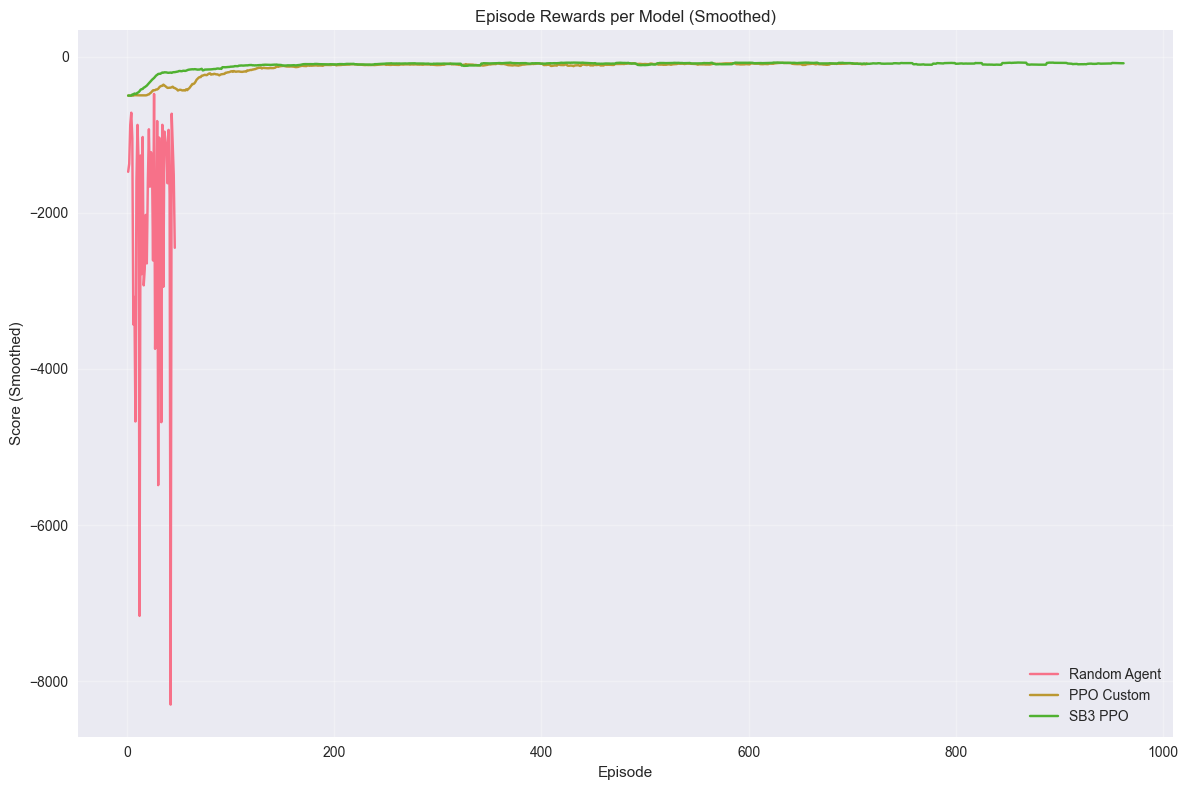

In [12]:
for model_name, scores in zip(results['models'], results['episode_rewards']):
    # Smooth the scores with a rolling mean for better visualization
    window = max(1, len(scores) // 50)
    smoothed = pd.Series(scores).rolling(window, min_periods=1).mean()
    plt.plot(range(1, len(scores) + 1), smoothed, label=model_name)

plt.xlabel('Episode')
plt.ylabel('Score (Smoothed)')
plt.title('Episode Rewards per Model (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
import gymnasium as gym
import torch
import numpy as np
import cv2
import os
from datetime import datetime
from IPython.display import Video


VIDEO_NAME = f'my_ppo_episode_{datetime.now().strftime("%Y%m%d_%H%M%S")}.mp4'
MAX_STEPS = 500

print(f"🎬 Registrando un episodio del tuo modello PPO...")
print(f"Environment: {ENV_NAME}")
print(f"Video: {VIDEO_NAME}")

# ============================================================================
# REGISTRAZIONE EPISODIO
# ============================================================================

# Crea environment con render
env = gym.make(ENV_NAME, render_mode='rgb_array')

# Reset environment
state = env.reset()
if isinstance(state, tuple):
    state = state[0]

# Lista per salvare i frames
frames = []
episode_score = 0
step = 0

print(f"🎮 Inizio episodio...")

# Gioca un episodio completo
while step < MAX_STEPS:
    # Cattura frame
    frame = env.render()
    frames.append(frame)
    
    # Azione del modello (assicurati che ppo_agent sia definito)
    with torch.no_grad():
        action, _, _ = ppo_agent.policy.act(torch.FloatTensor(state).unsqueeze(0))
    
    # Esegui azione
    next_state, reward, done, _, _ = env.step(action)
    
    state = next_state
    episode_score += reward
    step += 1
    
    # Termina se episodio finito
    if done:
        break

env.close()

print(f"✅ Episodio completato!")
print(f"📊 Score finale: {episode_score}")
print(f"🎬 Frames registrati: {len(frames)}")
print(f"⏱️ Durata: {step} steps")

# ============================================================================
# SALVA VIDEO
# ============================================================================

def save_video(frames, filename, fps=30):
    """Salva i frames come video MP4"""
    if len(frames) == 0:
        print("❌ Nessun frame da salvare!")
        return False
    
    # Dimensioni video
    height, width, channels = frames[0].shape
    
    # Crea video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))
    
    # Scrivi ogni frame
    for frame in frames:
        # Converti RGB -> BGR per OpenCV
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
    
    out.release()
    print(f"💾 Video salvato: {filename}")
    return True

# Salva il video
if save_video(frames, VIDEO_NAME):
    print(f"🎉 Video creato con successo!")
    
    # Mostra video nel notebook
    print(f"🎬 Visualizzazione video:")
    display(Video(VIDEO_NAME, width=600, height=400))
else:
    print(f"❌ Errore nel salvare il video")

print(f"\n✅ COMPLETATO!")
print(f"📁 File salvato: {VIDEO_NAME}")

🎬 Registrando un episodio del tuo modello PPO...
Environment: Acrobot-v1
Video: my_ppo_episode_20250629_112454.mp4
🎮 Inizio episodio...


/Users/riccardo/Desktop/IntroToML_Project/ppo_env/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


✅ Episodio completato!
📊 Score finale: -90.0
🎬 Frames registrati: 91
⏱️ Durata: 91 steps
💾 Video salvato: my_ppo_episode_20250629_112454.mp4
🎉 Video creato con successo!
🎬 Visualizzazione video:



✅ COMPLETATO!
📁 File salvato: my_ppo_episode_20250629_112454.mp4
